In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from matplotlib.textpath import TextPath
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import dendrogram

In [2]:
df = pd.read_csv('../dataset/movies_complete.csv')
#dfs is the original dataframe without slicing, since df would be used as a sliced dataframe later on 
dfs = df.sample(frac=1)
dfs.shape


(3728, 56)

## Visualisation of the Dataframe

### **Original Dataframe**

In [3]:
print(dfs.shape)
dfs.head()

(3728, 56)


,Unnamed: 0,filename,text,IMDB_ID,genre,year,production_region,corpus,duration,directors,...,Ratings,Metascore,imdbRating,imdbVotes,Type,DVD,BoxOffice,Production,Website,Response
2519,2519,6735571.xml,"Hey , seid nicht so wild , hier ist es total g...",tt1780798,"Drama,Fantasy,Horror",2014.0,English,untokenisiert,100.0,nm1218281,...,"[{'Source': 'Internet Movie Database', 'Value'...",42.0,5.7,"20,875",movie,23 Aug 2016,"$51,809","Dimension Films, Anchor Bay Entertainment",NaN,True
3002,3002,6487064.xml,"Fragt ihr euch manchmal : "" Was geht wohl in d...",tt2096673,"Adventure,Animation,Comedy",2015.0,NaN,untokenisiert,95.0,"nm0230032,nm0215455",...,"[{'Source': 'Internet Movie Database', 'Value'...",94.0,8.1,"583,639",movie,03 Nov 2015,"$264,317,903",Disney/Pixar,NaN,True
1452,1452,4745534.xml,CLOUD ATLAS Pazifischer Ozean Oktober 1849 Cam...,tt1371111,"Drama,Sci-Fi",2012.0,"English, Spanish",untokenisiert,172.0,"nm0905152,nm0905154,nm0878756",...,"[{'Source': 'Internet Movie Database', 'Value'...",55.0,7.4,"337,874",movie,14 May 2013,"$22,100,000",Warner Bros. Pictures,NaN,True
2793,2793,6018419.xml,( WELLEN BRECHEN ) ( MÖWEN KRÄCHZEN ) ( UNDEUT...,tt3112654,"Action,Thriller",2014.0,French,untokenisiert,90.0,nm0146991,...,"[{'Source': 'Internet Movie Database', 'Value'...",NaN,6.1,"2,553",movie,NaN,NaN,20th Century Fox,NaN,True
788,788,5593296.xml,"Komm schon . Ah , komm schon . Ethan ? - Catie...",tt1447793,"Comedy,Romance",2010.0,English,untokenisiert,84.0,nm1111123,...,"[{'Source': 'Internet Movie Database', 'Value'...",NaN,5.8,"5,586",movie,01 Mar 2011,NaN,Independent Pictures,NaN,True


In [4]:
df.columns


Index(['Unnamed: 0', 'filename', 'text', 'IMDB_ID', 'genre', 'year',
       'production_region', 'corpus', 'duration', 'directors', 'writers',
       'titleType', 'primaryTitle', 'originalTitle', 'isAdult', 'startYear',
       'endYear', 'runtimeMinutes', 'averageRating', 'numVotes',
       'mean_sentence_length', 'type_token_ratio', 'text_length',
       'originalTitleLang', 'lemma', 'pos', 'tag', 'dep', 'shape', 'ent_text',
       'ent_label', 'imdbID', 'Title', 'Year', 'Rated', 'Released', 'Runtime',
       'Genre', 'Director', 'Writer', 'Actors', 'Plot', 'Language', 'Country',
       'Awards', 'Poster', 'Ratings', 'Metascore', 'imdbRating', 'imdbVotes',
       'Type', 'DVD', 'BoxOffice', 'Production', 'Website', 'Response'],
      dtype='object')

In [6]:
df.drop(['Unnamed: 0', 'filename', 'IMDB_ID', 'production_region', 'corpus', 'duration', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult','endYear', 'startYear', 'numVotes', 'mean_sentence_length', 'type_token_ratio', 'text_length', 'originalTitleLang', 'lemma', 'pos', 'tag', 'dep', 'shape', 'ent_text','ent_label', 'imdbID', 'Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 'Actors', 'Plot', 'Country', 'Awards', 'Poster', 'Ratings', 'Metascore', 'imdbRating', 'imdbVotes', 'Type', 'DVD', 'BoxOffice', 'Production', 'Website', 'Response'], axis=1).head()

,text,genre,year,directors,writers,runtimeMinutes,averageRating,Language
0,Der Roman von Alexandre Dumas dem Älteren hatt...,"Adventure,Drama,History",1943.0,"nm0894509,nm0148602","nm0241416,nm0816458,nm0763376,nm0812731",90.0,7.0,French
1,Hände hoch oder ich schieße ( 1966 ) dTV - MDR...,Comedy,1966.0,nm0440757,"nm0440757,nm0833141,nm1127102",75.0,5.8,German
2,"Hallo , Manuela ? Störe ich ? Kann ich zu dir ...",Drama,1967.0,nm0816215,nm0816215,78.0,7.0,French
3,Dein Vater war ein ausgezeichneter Kämpfer . A...,"Action,Adventure",1978.0,nm1172472,NaN,82.0,6.2,Korean
4,"Na los , iss jetzt schnell auf . Junge , ist d...",Action,1979.0,nm0814232,"nm0032816,nm0793999,nm0814232",96.0,5.7,Japanese


### **Dataframe without NaN in text, genre, year and production_region**

In [23]:
df.dropna(subset=['writers', 'genre', 'directors', 'Language', 'year', 'runtimeMinutes', 'averageRating'], inplace=True)
df.drop_duplicates(subset=['IMDB_ID'], inplace=True)
df.head()

,Unnamed: 0,filename,text,IMDB_ID,genre,year,production_region,corpus,duration,directors,...,imdbVotes,Type,DVD,BoxOffice,Production,Website,Response,main_language,number_of_languages,colors
0,0,6416324.xml,Der Roman von Alexandre Dumas dem Älteren hatt...,tt1104767,"Adventure,Drama,History",1943.0,French,untokenisiert,90.0,"nm0894509,nm0148602",...,76,movie,NaN,NaN,NaN,NaN,True,French,1,red
1,1,4732286.xml,Hände hoch oder ich schieße ( 1966 ) dTV - MDR...,tt1631717,Comedy,1966.0,German,untokenisiert,75.0,nm0440757,...,19,movie,NaN,NaN,NaN,NaN,True,German,1,red
2,2,6122081.xml,"Hallo , Manuela ? Störe ich ? Kann ich zu dir ...",tt1271979,Drama,1967.0,French,untokenisiert,78.0,nm0816215,...,25,movie,NaN,NaN,NaN,NaN,True,French,1,red
4,4,5618549.xml,"Na los , iss jetzt schnell auf . Junge , ist d...",tt1065116,Action,1979.0,Japanese,untokenisiert,96.0,nm0814232,...,32,movie,NaN,NaN,NaN,NaN,True,Japanese,1,red
5,5,4208202.xml,Was geht auf diesem Land von Fluss Ganga heutz...,tt1454012,"Action,Crime,Drama",1991.0,Hindi,untokenisiert,154.0,nm0385758,...,25,movie,18 Mar 2008,NaN,NaN,NaN,True,Hindi,1,red


In [8]:
df.iloc[df.Language.apply(lambda x: len(x)).argmax()].Language

'English, French, Tibetan, Mandarin, Russian, Hindi, Portuguese, Latin, Italian, Spanish'

## Plot Language

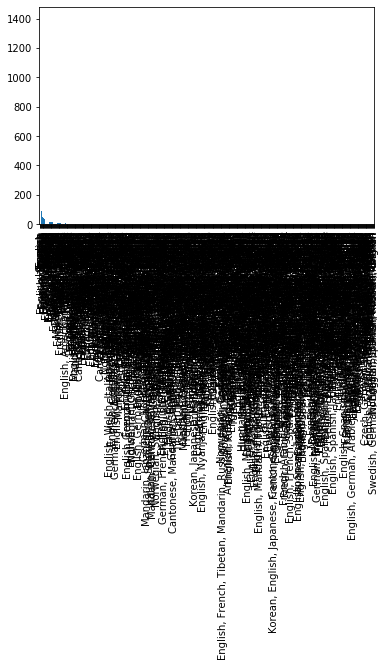

In [9]:
pd.value_counts(df['Language']).plot.bar()

# Plot Main Language (the first language mentioned on each rows)

In [10]:
df['main_language'] = df.Language.str.split(',')
main = df['main_language']
main_language = main.apply(lambda x: x[0])
df['main_language'] = main_language
df.head()

,Unnamed: 0,filename,text,IMDB_ID,genre,year,production_region,corpus,duration,directors,...,Metascore,imdbRating,imdbVotes,Type,DVD,BoxOffice,Production,Website,Response,main_language
0,0,6416324.xml,Der Roman von Alexandre Dumas dem Älteren hatt...,tt1104767,"Adventure,Drama,History",1943.0,French,untokenisiert,90.0,"nm0894509,nm0148602",...,NaN,7.1,76,movie,NaN,NaN,NaN,NaN,True,French
1,1,4732286.xml,Hände hoch oder ich schieße ( 1966 ) dTV - MDR...,tt1631717,Comedy,1966.0,German,untokenisiert,75.0,nm0440757,...,NaN,6.0,19,movie,NaN,NaN,NaN,NaN,True,German
2,2,6122081.xml,"Hallo , Manuela ? Störe ich ? Kann ich zu dir ...",tt1271979,Drama,1967.0,French,untokenisiert,78.0,nm0816215,...,NaN,6.6,25,movie,NaN,NaN,NaN,NaN,True,French
4,4,5618549.xml,"Na los , iss jetzt schnell auf . Junge , ist d...",tt1065116,Action,1979.0,Japanese,untokenisiert,96.0,nm0814232,...,NaN,5.6,32,movie,NaN,NaN,NaN,NaN,True,Japanese
5,5,4208202.xml,Was geht auf diesem Land von Fluss Ganga heutz...,tt1454012,"Action,Crime,Drama",1991.0,Hindi,untokenisiert,154.0,nm0385758,...,NaN,4.2,25,movie,18 Mar 2008,NaN,NaN,NaN,True,Hindi


In [13]:
from collections import Counter
main_language_frequs = Counter(df.main_language)
print('There are', len(main_language_frequs), 'main languages are spoken in the Movies')
main_language_frequs.most_common(20)



There are 66 main languages are spoken in the Movies


[('English', 2036),
 ('French', 353),
 ('German', 302),
 ('Japanese', 143),
 ('Spanish', 113),
 ('Korean', 72),
 ('Mandarin', 69),
 ('Norwegian', 56),
 ('Turkish', 55),
 ('Italian', 40),
 ('Cantonese', 36),
 ('Swedish', 36),
 ('Russian', 34),
 ('Danish', 33),
 ('Dutch', 32),
 ('Hindi', 23),
 ('Icelandic', 23),
 ('Thai', 22),
 ('Portuguese', 16),
 ('Greek', 13)]

In [14]:
df.main_language.unique()
print(df.main_language.unique())

['French' 'German' 'Japanese' 'Hindi' 'Mandarin' 'English' 'Korean'
 'Cantonese' 'Turkish' 'Danish' 'Romanian' 'Spanish' 'Dutch' 'Filipino'
 'Kirghiz' 'Thai' 'Polish' 'Icelandic' 'Norwegian' 'Russian' 'Hebrew'
 'Portuguese' 'Swedish' 'Italian' 'Greek' 'Arabic' 'Finnish' 'Min Nan'
 'Latin' 'Catalan' 'Saami' 'Egyptian (Ancient)' 'Indonesian' 'Serbian'
 'Lithuanian' 'Albanian' 'Chinese' 'Vietnamese' 'Tibetan' 'Bosnian'
 'Swiss German' 'Czech' 'Greenlandic' 'Ladakhi' 'Hungarian' 'Persian'
 'Flemish' 'Aboriginal' 'Malay' 'Estonian' 'Kurdish' 'Slovak' 'Xhosa'
 'Punjabi' 'Croatian' 'Inuktitut' 'Georgian' 'Slovenian' 'Armenian'
 'Maori' 'Telugu' 'Tamil' 'Amharic' 'Maya' 'Romany' 'Ukrainian']


**Main Language Plot**

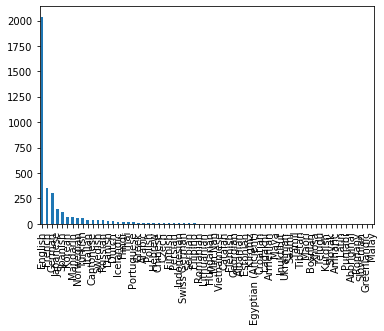

In [15]:
pd.value_counts(df['main_language']).plot.bar()

# Language

In [16]:
df.Language.unique()
print(df.Language.unique())

['French' 'German' 'Japanese' 'Hindi' 'Mandarin' 'English' 'Korean'
 'Cantonese, English, Thai, Mandarin' 'Turkish' 'Danish' 'Romanian'
 'Spanish' 'Dutch' 'Filipino, Tagalog' 'Kirghiz' 'Thai, English'
 'Polish, Italian' 'Icelandic' 'Japanese, Mandarin' 'French, Italian'
 'Thai' 'Thai, French' 'French, Arabic' 'English, Hindi, French, German'
 'Norwegian, Urdu' 'Spanish, French' 'English, Russian' 'Russian'
 'Norwegian, German, English, Russian, Finnish' 'English, German'
 'English, Serbo-Croatian' 'English, German, Russian'
 'English, Spanish, Russian' 'German, Russian, Georgian' 'Hebrew'
 'French, German, Latin' 'Norwegian' 'Portuguese, Mandarin, Japanese'
 'Japanese, Italian' 'Swedish' 'English, Spanish'
 'French, Bambara, Spanish' 'French, English' 'English, Korean, Estonian'
 'Italian' 'Spanish, Bable, English' 'Greek' 'Spanish, Korean, Russian'
 'English, Klingon' 'English, Cantonese' 'Icelandic, Spanish'
 'English, Italian' 'Arabic, English, Hebrew' 'Dutch, French'
 'French, Germ

In [17]:
from collections import Counter
languages_combination_frequs = Counter(df.Language)
languages_combination_frequs.most_common(20)

[('English', 1410),
 ('French', 208),
 ('German', 192),
 ('Japanese', 116),
 ('English, Spanish', 92),
 ('Spanish', 77),
 ('English, French', 51),
 ('Korean', 50),
 ('Turkish', 45),
 ('French, English', 45),
 ('Mandarin', 35),
 ('German, English', 29),
 ('English, Russian', 28),
 ('English, German', 26),
 ('Norwegian', 25),
 ('Danish', 21),
 ('Dutch', 21),
 ('Italian', 21),
 ('English, Japanese', 21),
 ('Russian', 20)]

In [18]:
lang = df.Language
lang.head(30)

0                                 French
1                                 German
2                                 French
4                               Japanese
5                                  Hindi
6                               Mandarin
7                               Japanese
8                               Japanese
9                               Japanese
10                                French
11                              Japanese
12                              Japanese
13                               English
14                                French
15                                Korean
16    Cantonese, English, Thai, Mandarin
17                              Japanese
18                              Japanese
19                               Turkish
20                              Japanese
21                                French
22                                Danish
23                               English
24                               English
25              

## Number of Languages

In [19]:
df['number_of_languages']= df['Language'].str.split(',').apply(len)
df.head()


,Unnamed: 0,filename,text,IMDB_ID,genre,year,production_region,corpus,duration,directors,...,imdbRating,imdbVotes,Type,DVD,BoxOffice,Production,Website,Response,main_language,number_of_languages
0,0,6416324.xml,Der Roman von Alexandre Dumas dem Älteren hatt...,tt1104767,"Adventure,Drama,History",1943.0,French,untokenisiert,90.0,"nm0894509,nm0148602",...,7.1,76,movie,NaN,NaN,NaN,NaN,True,French,1
1,1,4732286.xml,Hände hoch oder ich schieße ( 1966 ) dTV - MDR...,tt1631717,Comedy,1966.0,German,untokenisiert,75.0,nm0440757,...,6.0,19,movie,NaN,NaN,NaN,NaN,True,German,1
2,2,6122081.xml,"Hallo , Manuela ? Störe ich ? Kann ich zu dir ...",tt1271979,Drama,1967.0,French,untokenisiert,78.0,nm0816215,...,6.6,25,movie,NaN,NaN,NaN,NaN,True,French,1
4,4,5618549.xml,"Na los , iss jetzt schnell auf . Junge , ist d...",tt1065116,Action,1979.0,Japanese,untokenisiert,96.0,nm0814232,...,5.6,32,movie,NaN,NaN,NaN,NaN,True,Japanese,1
5,5,4208202.xml,Was geht auf diesem Land von Fluss Ganga heutz...,tt1454012,"Action,Crime,Drama",1991.0,Hindi,untokenisiert,154.0,nm0385758,...,4.2,25,movie,18 Mar 2008,NaN,NaN,NaN,True,Hindi,1


1     2391
2      703
3      344
4      115
5       59
6       23
7        5
10       1
Name: number_of_languages, dtype: int64

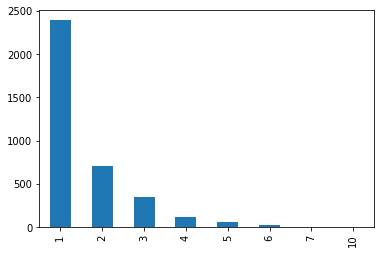

In [20]:
pd.value_counts(df['number_of_languages']).plot.bar()
pd.value_counts(df.number_of_languages) 

red     2391
blue    1250
Name: colors, dtype: int64

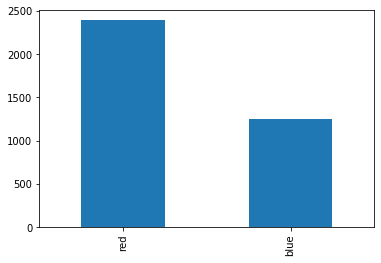

In [21]:
colors = []
for x in df.number_of_languages:
    if x == 1:
        colors.append('red')
    elif x >> 1:
        colors.append('blue')
df['colors']=colors
      
df_clean = df[df.colors != 'white']
pd.value_counts(df_clean.colors).plot.bar() 
pd.value_counts(df_clean.colors)

In [22]:
tfidf = TfidfVectorizer(max_features=100)
tokens = tfidf.fit_transform(df_clean.text)

In [49]:
tokens.toarray(), tokens.shape

(array([[0.        , 0.01365175, 0.01498478, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.00363836, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.00355583, 0.        ,
         0.        ],
        [0.        , 0.        , 0.01015327, ..., 0.00307365, 0.00475042,
         0.        ]]),
 (3111, 10000))

In [51]:
import seaborn as sns
import umap

In [52]:
from umap import UMAP 
reducer = UMAP()
Xr_tfidf = reducer.fit_transform(tokens)

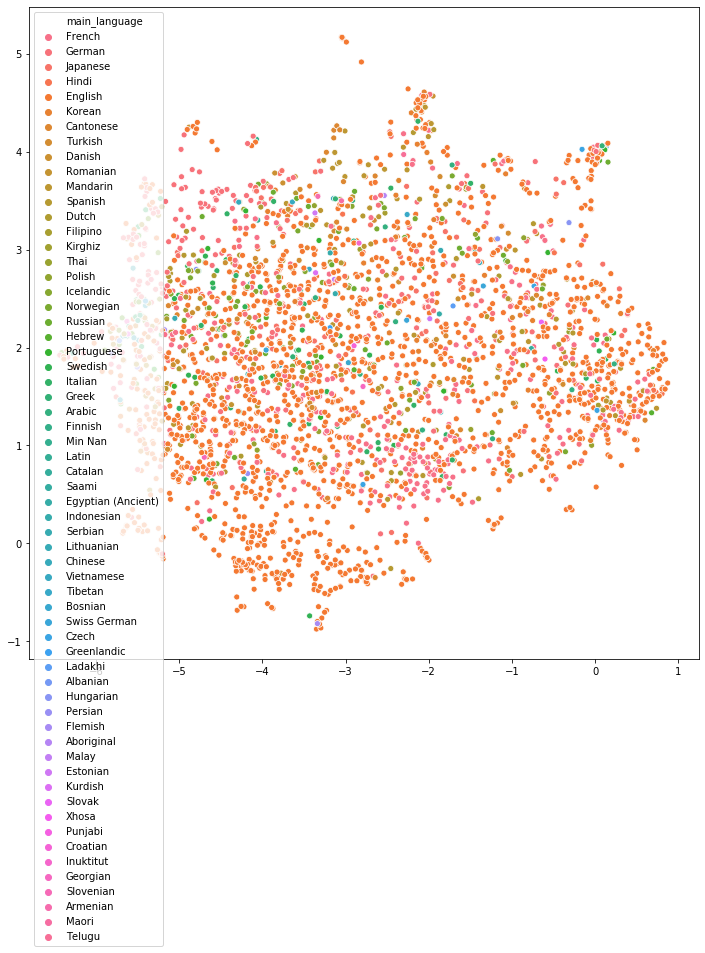

In [54]:
plt.figure(figsize=(12,12))
sns.scatterplot(Xr_tfidf[:,0], Xr_tfidf[:,1], hue=df['main_language'])
plt.show()

In [55]:
models = KMeans(n_clusters=2)
models.fit(tokens)

KeyboardInterrupt: 

In [ ]:
from umap import UMAP 
reducer = UMAP()
Xr_tfidf = reducer.fit_transform(tokens)

In [ ]:
plt.figure(figsize=(12,12))
sns.scatterplot(Xr_tfidf[:,0], Xr_tfidf[:,1], hue=df['main_language'])
plt.show()

### Production Continent Plot

In [104]:
from collections import Counter
prod_continent_frequs = Counter(df.production_continent)
print('There are', len(prod_continent_frequs), 'production continents where the Movies are produced')
prod_continent_frequs.most_common()

TypeError: unhashable type: 'list'

# Cluster Main Continent

### Divisional Main Continent  

orange    6864
blue      3335
green     1307
red         40
purple       6
brown        4
pink         1
Name: colors, dtype: int64

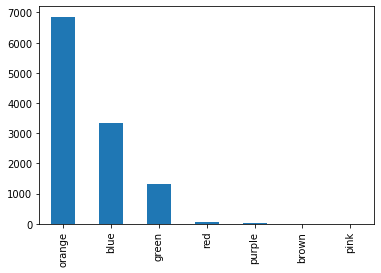

In [24]:
colors = []
for x in df.main_continent:
    if x == 'North America':
        colors.append('orange')
    elif x == 'South America':
        colors.append('pink')
    elif x == 'Europe':
        colors.append('blue')
    elif x == 'Africa':
        colors.append('purple')
    elif x == 'Asia':
        colors.append('green')
    elif x == 'Australia':
        colors.append('brown')
    elif x == 'Antartica':
        colors.append('yellow')
    elif x == 'Uncategorised':
        colors.append('red')
    else: 
        colors.append('white')
df['colors']=colors
      
df_clean = df[df.colors != 'white']
pd.value_counts(df_clean.colors).plot.bar() 
pd.value_counts(df_clean.colors)

In [25]:
tfidf = TfidfVectorizer(max_features=10000)
tokens = tfidf.fit_transform(df_clean.text)


In [26]:
tokens.toarray(), tokens.shape

(array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.00354427,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.00308994,
         0.00483548]]),
 (11557, 10000))

In [27]:
models = KMeans(n_clusters=7)
models.fit(tokens)

KeyboardInterrupt: 

In [ ]:
len(models.labels_)

In [ ]:
pca = PCA(n_components=7)
pca.fit(tokens.todense())
X_tf = pca.transform(tokens.todense())

#Saving the temporal results into Dataframe
df_clean['pcatokens_1'] = X_tf[:,0]
df_clean['pcatokens_2'] = X_tf[:,1]
df_clean['pcatokens_3'] = X_tf[:,2]
df_clean['pcatokens_4'] = X_tf[:,3]
df_clean['pcatokens_5'] = X_tf[:,4]
df_clean['pcatokens_6'] = X_tf[:,5]
df_clean['pcatokens_7'] = X_tf[:,6]

df_clean['kmeanstokens'] = models.labels_

#Plot based on temporal results 
plt.figure(figsize=(15,8))
for d in dfs_clean.iterrows():
    a = d[1].pcatokens_1
    b = d[1].pcatokens_2
    c = d[1].pcatokens_3
    d = d[1].pcatokens_4
    e = d[1].pcatokens_5
    f = d[1].pcatokens_6
    g = d[1].pcatokens_7
    plt.plot(a, b, c, d , e , f, g, 'o', markersize=4, color= d[1].colors)
    plt.plot(a, b, c, d , e , f, g, marker=TextPath((-3, -3), f'{d[1].kmeanstokens}'), color='black', markersize=1)

In [28]:
import seaborn as sns
import umap

## K-Means

In [ ]:
from umap import UMAP 
reducer = UMAP()
Xrr_tfidf = reducer.fit_transform(tokens)

In [ ]:
plt.figure(figsize =(13,13))
plt.scatter(Xrr_tfidf[:, 0], Xrr_tfidf[:, 1], c=y_kmeans, s=10, cmap=plt.cm.Paired)

In [ ]:
centers = kmeans.cluster_centers_

In [ ]:
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=50, alpha=0.5)

In [ ]:
kmeans = KMeans(n_clusters=7)
kmeans.fit(tokens)
y_kmeans = kmeans.predict(tokens)


from umap import UMAP 
reducer = UMAP()
Xrr_tfidf = reducer.fit_transform(tokens)

plt.figure(figsize =(13,13))
plt.scatter(Xrr_tfidf[:, 0], Xrr_tfidf[:, 1], c=y_kmeans, s=10, cmap=plt.cm.Paired)

centers = kmeans.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=50, alpha=0.5)

### GMM

In [ ]:
tfidf = TfidfVectorizer(max_features=1000)
tokens_2var = tfidf.fit_transform(dfs_2var.text)
gmm = mixture.GaussianMixture(n_components=2, covariance_type='diag')
gmm_label = gmm.fit_predict(tokens_2var.toarray())
gmm.converged_

In [ ]:
gmm_label

In [ ]:
pca = PCA(n_components=2)
pca.fit(tokens_2var.todense())
X_tf = pca.transform(tokens_2var.todense())

#Abspeichern der Zwischenergebnisste im Datafram
dfs_2var['gmm1'] = X_tf[:,0]
dfs_2var['gmm2'] = X_tf[:,1]
dfs_2var['gmmlabel'] = gmm_label
print('Comedy, Crime, Drama in rot VS Comedy, Horror in blau')
#Plotten anhand der gespeicherten Zwischenergebnisse 
plt.figure(figsize=(15,8))
for d in dfs_2var.iterrows():
    x = d[1].gmm1
    y = d[1].gmm2    
    plt.plot(x, y, 'o', markersize=14, color= d[1].labelcolor2var)
    plt.plot(x, y, marker=TextPath((-3, -3), f'{d[1].gmmlabel}'), color='white', markersize=12)

In [ ]:
df['labelcolor']=colorlist

In [ ]:
North_AmericaValue = 'North America'
EuropeValue = 'Europe'
North_America = df.production_continent = North_AmericaValue
Europe = df.production_continent = EuropeValue
production_continents = North_AmericaValue + EuropeValue
colorlist = []

for x in df.production_region:
    if x =='North America':
        colorlist.append('red')
    elif x =='Europe':
        colorlist.append('blue')
    else: 
        colorlist.append('white')

In [ ]:
pd.value_counts(dfs.colors).plot.bar() 
pd.value_counts(dfs.colors)

# Split without Embedding
